# CPSC 4830 - Project
## Auto-tag Image: Using Classification and Deep Learning

## Team Member
### Nguyen Thu Thao (Katie) - 100329190 
### Phan Thi Thu Hong (Suzie) – 100330122
### Ninh Truong Hai Nguyen (Hani) – 100321710

# Import data

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tqdm import tqdm
from random import randint
import seaborn as sns

In [2]:
#import csv file of image names and labels
df_label = pd.read_csv("G:/Ninh/Python/Hackathon Gala Images/train.csv")
df_label

Image   Class
0      image7042.jpg    Food
1      image3327.jpg    misc
2     image10335.jpg  Attire
3      image8019.jpg    Food
4      image2128.jpg  Attire
...              ...     ...
5978   image2494.jpg    Food
5979   image8015.jpg  Attire
5980   image4975.jpg    Food
5981   image1222.jpg    Food
5982   image9635.jpg  Attire

[5983 rows x 2 columns]

In [3]:
#Encode class label: Attire(0), Decorationandsignage(1), Food (2), misc(3) 
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df_label["Class_1"] = lb.fit_transform(df_label["Class"])
df_label.head(20)

Image                 Class  Class_1
0    image7042.jpg                  Food        2
1    image3327.jpg                  misc        3
2   image10335.jpg                Attire        0
3    image8019.jpg                  Food        2
4    image2128.jpg                Attire        0
5    image1106.jpg                  misc        3
6    image6750.jpg                  Food        2
7    image5508.jpg                  Food        2
8    image9571.jpg                  Food        2
9    image9613.jpg                  Food        2
10   image1719.jpg                Attire        0
11     image61.jpg  Decorationandsignage        1
12  image10285.jpg                  Food        2
13    image129.jpg  Decorationandsignage        1
14   image6760.jpg                  Food        2
15    image192.jpg                  Food        2
16   image2008.jpg                Attire        0
17   image3892.jpg                  misc        3
18   image9817.jpg                  Food        2
19   image3123.jpg                  Food        2

In [4]:
print(df_label["Class"].unique())
print(df_label["Class_1"].unique())

['Food' 'misc' 'Attire' 'Decorationandsignage']
[2 3 0 1]


In [5]:
#function to transform from image to numeric array and merge with its label
def class_data(directory):
    Images = []
    Labels = []
    j=0
    for i in tqdm(df_label['Image']):
        final_path=os.path.join(directory,i)
        image = cv2.imread(final_path) 
        if image is not None:
            image_1 = cv2.resize(image,(32,32))
            image_1 = image_1.astype('float32')
            image_1 = image_1/255.
        label = df_label['Class_1'][j]
        Images.append(image_1)
        Labels.append(label)
        j=j+1
    return Images,Labels

In [6]:
Images, Labels = class_data("G:/Ninh/Python/Hackathon Gala Images/Train Images")

100%|██████████| 5983/5983 [00:13<00:00, 447.90it/s]


In [7]:
#converting the list of images to numpy array.
Images = np.array(Images) 
Labels = np.array(Labels)

In [8]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (5983, 32, 32, 3)
Shape of Labels: (5983,)


In [9]:
def deep_data(directory):
    Images = []
    Labels = []
    j=0
    for i in tqdm(df_label['Image']): 
        final_path=os.path.join(directory,i)
        image = cv2.imread(final_path)
        if image is not None:
            image_1 = cv2.resize(image,(150,150))
            image_1 = image_1.astype('float32')
            image_1 = image_1/255.
        label = df_label['Class_1'][j]
        Images.append(image_1)
        Labels.append(label)
        j=j+1
    return Images,Labels

In [10]:
Images_d, Labels_d = deep_data("G:/Ninh/Python/Hackathon Gala Images/Train Images")

100%|██████████| 5983/5983 [00:04<00:00, 1253.15it/s]


In [11]:
#converting the list of images to numpy array.
Images_d = np.array(Images_d) 
Labels_d = np.array(Labels_d)

In [12]:
print("Shape of Labels_d:",Images_d.shape)
print("Shape of Labels_d:",Labels_d.shape)

Shape of Labels_d: (5983, 150, 150, 3)
Shape of Labels_d: (5983,)


In [13]:
def vgg_data(directory):
    Images = []
    Labels = []
    j=0
    for i in tqdm(df_label['Image']): 
        final_path=os.path.join(directory,i)
        image = cv2.imread(final_path)
        if image is not None:
            image_1 = cv2.resize(image,(150,150))
            image_1 = image_1.astype('float32')
        label = df_label['Class_1'][j]
        Images.append(image_1)
        Labels.append(label)
        j=j+1
    return Images,Labels

In [15]:
Images_vgg, Labels_vgg = vgg_data("G:/Ninh/Python/Hackathon Gala Images/Train Images")

100%|██████████| 5983/5983 [00:04<00:00, 1359.21it/s]


In [16]:
#converting the list of images to numpy array.
Images_vgg = np.array(Images_vgg) 
Labels_vgg = np.array(Labels_vgg)

In [17]:
print("Shape of Labels_vgg:",Images_vgg.shape)
print("Shape of Labels_vgg:",Labels_vgg.shape)

Shape of Labels_vgg: (5983, 150, 150, 3)
Shape of Labels_vgg: (5983,)


# Explore Data

In [18]:
def get_classlabel(class_code):
    labels = {2:'Food', 3:'misc', 0:'Attire', 1:'Decorationandsignage'}
    
    return labels[class_code]

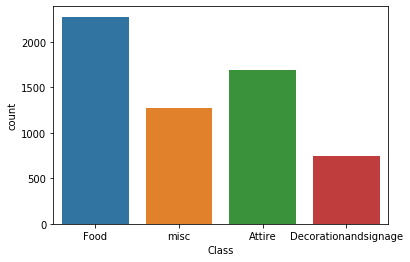

In [19]:
sns.countplot(df_label['Class'])

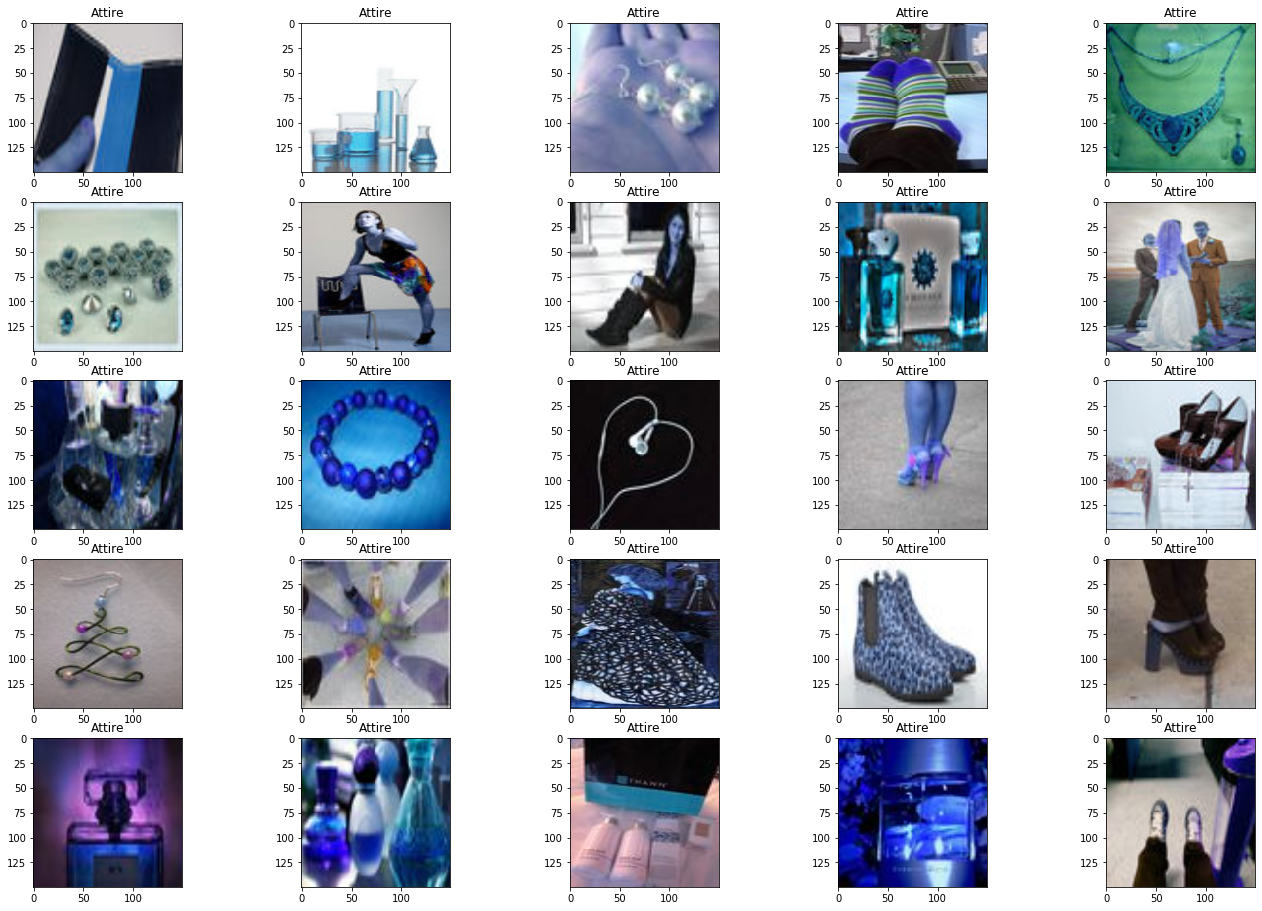

In [20]:
#show random attire images
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images_d[Labels_d==0]))
        ax[i,j].imshow(Images_d[Labels_d==0][rnd_number])
        ax[i,j].set_title((get_classlabel(0)))

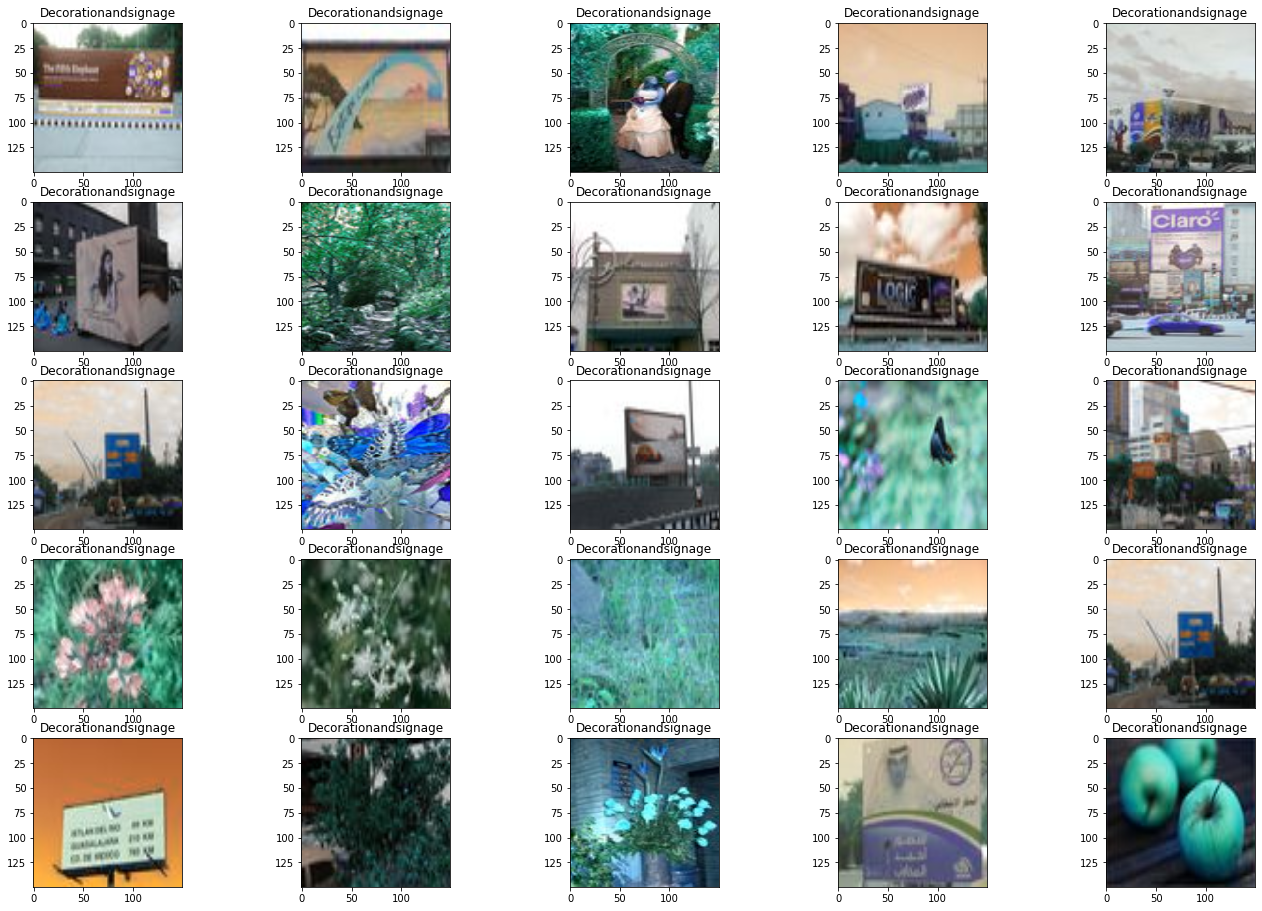

In [21]:
#show random Decoration & signage images
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images_d[Labels_d==1]))
        ax[i,j].imshow(Images_d[Labels_d==1][rnd_number])
        ax[i,j].set_title((get_classlabel(1)))

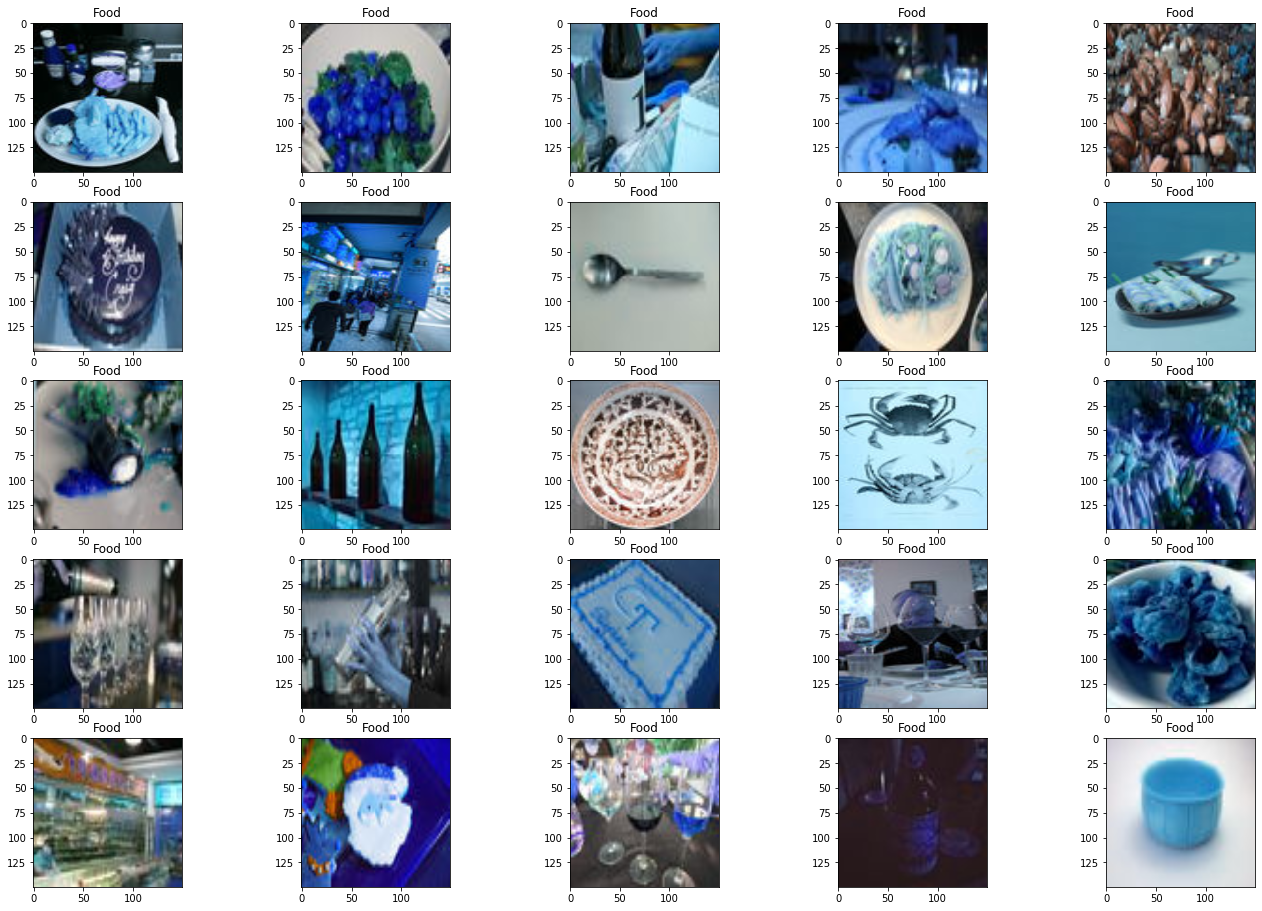

In [22]:
#show random Food images
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images_d[Labels_d==2]))
        ax[i,j].imshow(Images_d[Labels_d==2][rnd_number])
        ax[i,j].set_title((get_classlabel(2)))

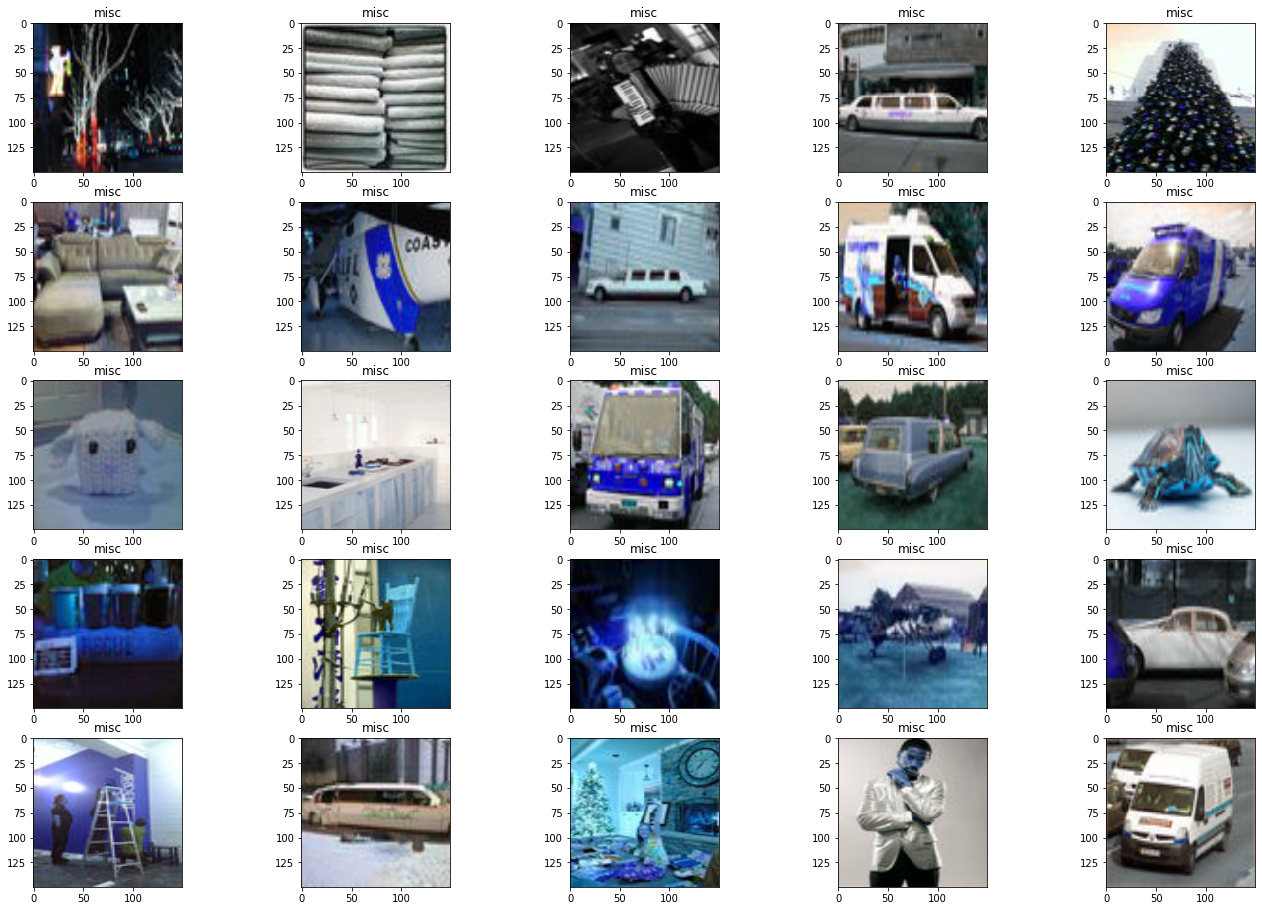

In [142]:
#show random misc images
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images_d[Labels_d==3]))
        ax[i,j].imshow(Images_d[Labels_d==3][rnd_number])
        ax[i,j].set_title((get_classlabel(3)))

# Classification

In [23]:
#reshape data to do classification
Image_class = Images.reshape(5983,3072)

In [24]:
print("Shape of Images:",Image_class.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (5983, 3072)
Shape of Labels: (5983,)


In [25]:
from sklearn.model_selection import train_test_split
Image_train, Image_test, label_train, label_test = train_test_split(Image_class, Labels, test_size=0.3)

## With PCA

In [26]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [27]:
pca.fit(Image_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca_train = pca.transform(Image_train)
pca_test = pca.transform(Image_test)

In [29]:
pca.n_components_

380

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)#the number of tree in the forest
rfc.fit(pca_train, label_train)

label_pred=rfc.predict(pca_test)

In [31]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(label_test, label_pred))

Accuracy: 0.4183844011142061


### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs', multi_class='auto', max_iter=400)
logisticRegr.fit(pca_train, label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
logisticRegr.predict(pca_test)

array([0, 1, 0, ..., 3, 2, 2])

In [35]:
score = logisticRegr.score(pca_test, label_test)
print(score)

0.4467966573816156


### XGBoost

In [37]:
import xgboost as xgb

In [38]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 5, alpha = 10, n_estimators = 500,num_class =4)

In [39]:
xg_class.fit(pca_train, label_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
preds = xg_class.predict(pca_test)
print("Accuracy:",metrics.accuracy_score(label_test, preds))

Accuracy: 0.4551532033426184


## No PCA

### Random Forest

In [41]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(Image_train, label_train)

label_pred=rfc.predict(Image_test)

In [42]:
print("Accuracy:",metrics.accuracy_score(label_test, label_pred))

Accuracy: 0.5041782729805014


### Logistic Regression

In [48]:
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter = 700)

from warnings import filterwarnings
filterwarnings('ignore')

logisticRegr.fit(Image_train, label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=700,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
logisticRegr.predict(Image_test)

array([0, 1, 3, ..., 2, 3, 2])

In [50]:
score = logisticRegr.score(Image_test, label_test)
print(score)

0.38495821727019497


### XGBoost

In [51]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 5, alpha = 10, n_estimators = 500,num_class =4)

In [52]:
xg_class.fit(Image_train, label_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
preds = xg_class.predict(Image_test)
print("Accuracy:",metrics.accuracy_score(label_test, preds))

Accuracy: 0.49415041782729807


# Deep Learning

In [54]:
import tensorflow
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import applications

## Build model from scratch

In [55]:
Labels_d = tensorflow.keras.utils.to_categorical(Labels_d, 4)

In [56]:
from sklearn.model_selection import train_test_split
I_train, I_test, l_train, l_test = train_test_split(Images_d, Labels_d, test_size=0.3)

In [57]:
reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

callbacks = [reduce_learning_rate]

In [58]:
model=Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (150,150,3))) 
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(256, (3, 3), activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(GlobalAveragePooling2D())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4,activation='softmax'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        9248      
____

In [59]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
model.fit(I_train, l_train, epochs = 25, batch_size = 32, validation_data=(I_test,l_test),verbose=2, callbacks=callbacks)

Train on 4188 samples, validate on 1795 samples
Epoch 1/25
4188/4188 - 450s - loss: 1.4598 - acc: 0.4004 - val_loss: 1.6424 - val_acc: 0.2724
Epoch 2/25
4188/4188 - 446s - loss: 1.2359 - acc: 0.4620 - val_loss: 1.2538 - val_acc: 0.4022
Epoch 3/25
4188/4188 - 438s - loss: 1.1719 - acc: 0.4869 - val_loss: 1.3529 - val_acc: 0.3922
Epoch 4/25
4188/4188 - 442s - loss: 1.1180 - acc: 0.5105 - val_loss: 1.2442 - val_acc: 0.4479
Epoch 5/25
4188/4188 - 457s - loss: 1.0959 - acc: 0.5291 - val_loss: 1.1906 - val_acc: 0.5064
Epoch 6/25
4188/4188 - 405s - loss: 1.0747 - acc: 0.5485 - val_loss: 1.3371 - val_acc: 0.3961
Epoch 7/25
4188/4188 - 397s - loss: 1.0547 - acc: 0.5511 - val_loss: 1.4412 - val_acc: 0.3827
Epoch 8/25
4188/4188 - 398s - loss: 1.0248 - acc: 0.5666 - val_loss: 1.1433 - val_acc: 0.5175
Epoch 9/25
4188/4188 - 398s - loss: 0.9784 - acc: 0.5948 - val_loss: 1.5058 - val_acc: 0.4613
Epoch 10/25
4188/4188 - 398s - loss: 0.9494 - acc: 0.6053 - val_loss: 1.0798 - val_acc: 0.5504
Epoch 11/25

In [61]:
datagen=ImageDataGenerator()
datagen.fit(I_train)

In [62]:
model_gen = model
model_gen.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 71, 71, 32)        1

In [63]:
model_gen.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
model_gen.fit_generator(datagen.flow(I_train, l_train, batch_size=32),
                        epochs=25,callbacks=callbacks, verbose=2,
                       validation_data=(I_test, l_test))

Epoch 1/25
131/131 - 437s - loss: 0.1631 - acc: 0.9425 - val_loss: 3.1515 - val_acc: 0.4747
Epoch 2/25
131/131 - 433s - loss: 0.1162 - acc: 0.9620 - val_loss: 2.4488 - val_acc: 0.5164
Epoch 3/25
131/131 - 433s - loss: 0.1017 - acc: 0.9649 - val_loss: 2.8864 - val_acc: 0.4992
Epoch 4/25
131/131 - 432s - loss: 0.0897 - acc: 0.9687 - val_loss: 2.7930 - val_acc: 0.4925
Epoch 5/25
131/131 - 431s - loss: 0.1078 - acc: 0.9637 - val_loss: 3.7514 - val_acc: 0.4763
Epoch 6/25

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
131/131 - 437s - loss: 0.1253 - acc: 0.9585 - val_loss: 3.0677 - val_acc: 0.5058
Epoch 7/25
131/131 - 456s - loss: 0.0658 - acc: 0.9768 - val_loss: 2.4016 - val_acc: 0.5231
Epoch 8/25
131/131 - 444s - loss: 0.0323 - acc: 0.9900 - val_loss: 2.4588 - val_acc: 0.5281
Epoch 9/25
131/131 - 436s - loss: 0.0273 - acc: 0.9902 - val_loss: 2.4522 - val_acc: 0.5343
Epoch 10/25
131/131 - 437s - loss: 0.0274 - acc: 0.9904 - val_loss: 2.5221 - val_acc: 0.53

## Build model with pre-trained model VGG16

The model_gen above gave a really high accuracy but when we tested on test data, it just gave around 55% acccuracy. Therefore, we look into another model using pretrained VGG16 model. This model improves the accuracy on test data to 76%.

In [65]:
from tensorflow.keras.applications.vgg16 import VGG16

In [66]:
datagen_vgg = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen_vgg.fit(Images_vgg)

In [67]:
base_model=VGG16(include_top=False, weights='imagenet',input_shape=(150,150,3), pooling='avg')

model_vgg=Sequential()
model_vgg.add(base_model)

model_vgg.add(Dense(256,activation='relu'))
model_vgg.add(Dense(4,activation='softmax'))

base_model.trainable=False

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

callbacks = [reduce_learning_rate]

model_vgg.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_vgg.fit_generator(datagen_vgg.flow(Images_vgg, to_categorical(Labels_vgg,4), batch_size=32),
                    epochs=10,callbacks=callbacks, verbose=2)

58892288/58889256 [==============================] - 83s 1us/step
Epoch 1/10
187/187 - 576s - loss: 1.6131 - acc: 0.6345
Epoch 2/10
187/187 - 569s - loss: 0.7204 - acc: 0.7326
Epoch 3/10
187/187 - 555s - loss: 0.5925 - acc: 0.7737
Epoch 4/10
187/187 - 527s - loss: 0.5204 - acc: 0.7994
Epoch 5/10
187/187 - 540s - loss: 0.4712 - acc: 0.8146
Epoch 6/10
187/187 - 542s - loss: 0.4140 - acc: 0.8414
Epoch 7/10
187/187 - 538s - loss: 0.4005 - acc: 0.8441
Epoch 8/10
187/187 - 532s - loss: 0.3706 - acc: 0.8618
Epoch 9/10
187/187 - 531s - loss: 0.3370 - acc: 0.8773
Epoch 10/10
187/187 - 530s - loss: 0.3129 - acc: 0.8855


## Prediction on test data

In [68]:
test = pd.read_csv("G:/Ninh/Python/Hackathon Gala Images/test.csv")
test

Image
0      image6245.jpg
1     image10409.jpg
2      image8692.jpg
3     image10517.jpg
4      image2580.jpg
...              ...
3214   image4968.jpg
3215   image6673.jpg
3216   image3442.jpg
3217   image8178.jpg
3218   image5367.jpg

[3219 rows x 1 columns]

In [69]:
def image_test(directory):
    pred_images = []
    for i in tqdm(test['Image']): #Extracting the file name of the image from Class Label folder
        final_path=os.path.join(directory,i)
        image = cv2.imread(final_path) #Reading the image (OpenCV)
        if image is not None:
            image_1 = cv2.resize(image,(150,150))
            image_1 = image_1.astype('float32')
        pred_images.append(image_1)
    return pred_images

In [70]:
pred_images = image_test("G:/Ninh/Python/Hackathon Gala Images/Test Images")
pred_images = np.array(pred_images)
pred_images.shape

100%|██████████| 3219/3219 [00:04<00:00, 764.25it/s] 


(3219, 150, 150, 3)

In [71]:
pred_class = [model_vgg.predict_classes(np.array([i])) for i in pred_images]

In [72]:
result = [get_classlabel(i[0]) for i in pred_class]
test['Class']=result

In [74]:
#export file to submit to the competition
test.to_csv(r'G:/Ninh/Python/Hackathon Gala Images/test_result/test1.csv', index = False)

## Explore prediction on test data

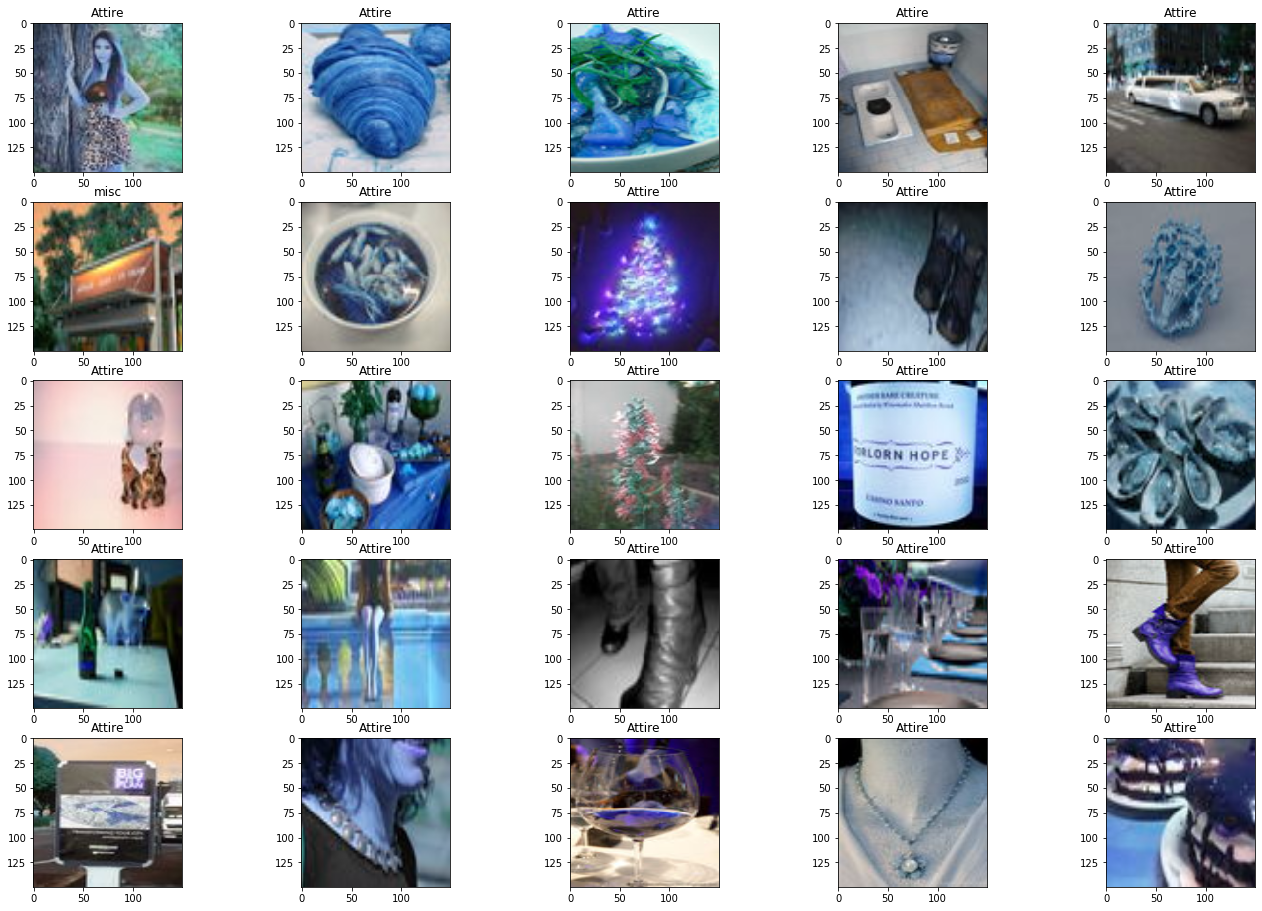

In [76]:
#predictions using 'model' model
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(pred_images))
        pred_image = np.array([pred_images[rnd_number]])
        pred_class = get_classlabel(model.predict_classes(pred_image)[0])
        ax[i,j].imshow(pred_image[0].astype('uint8'))
        ax[i,j].set_title(pred_class)

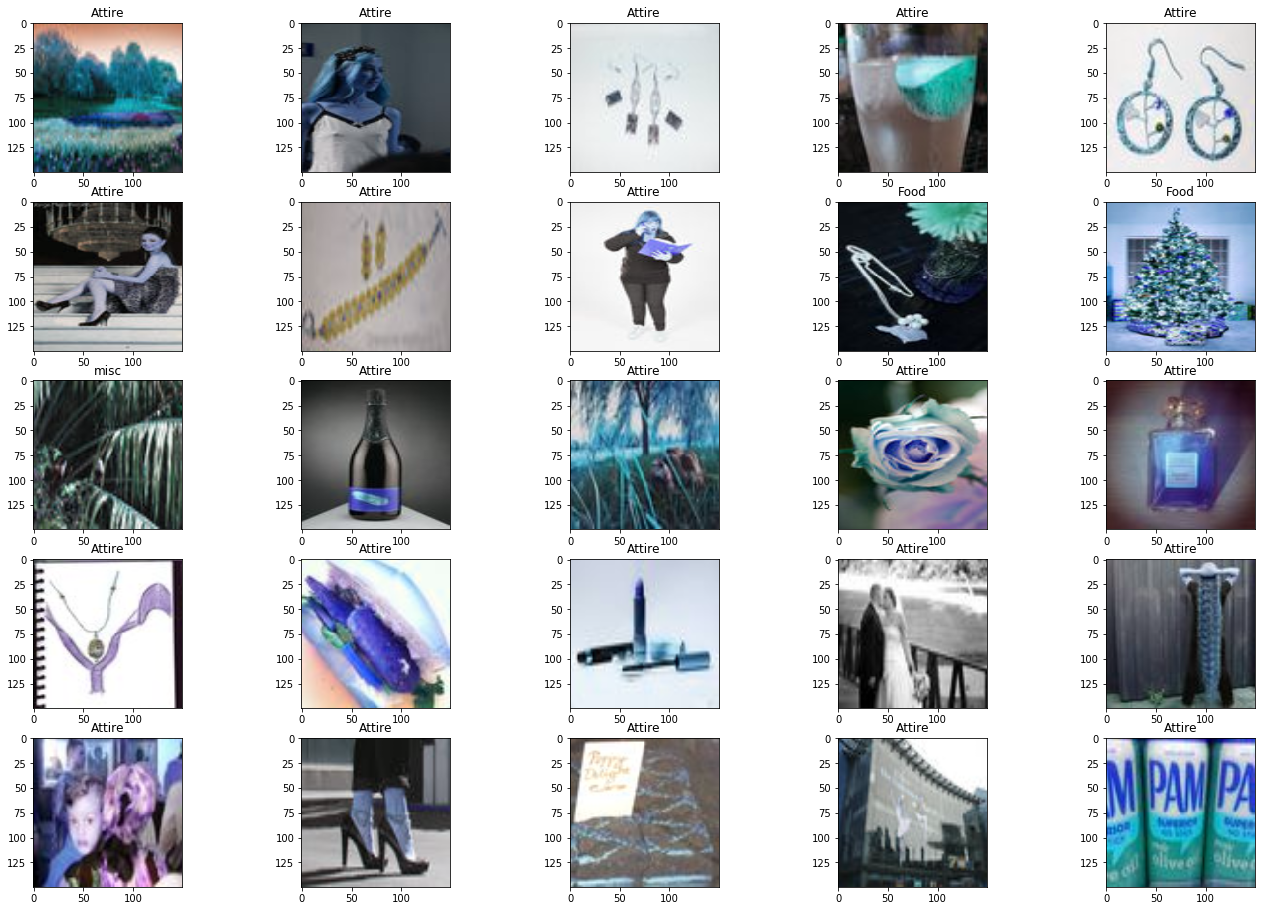

In [77]:
#predictions using 'model_gen' model
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(pred_images))
        pred_image = np.array([pred_images[rnd_number]])
        pred_class = get_classlabel(model_gen.predict_classes(pred_image)[0])
        ax[i,j].imshow(pred_image[0].astype('uint8'))
        ax[i,j].set_title(pred_class)

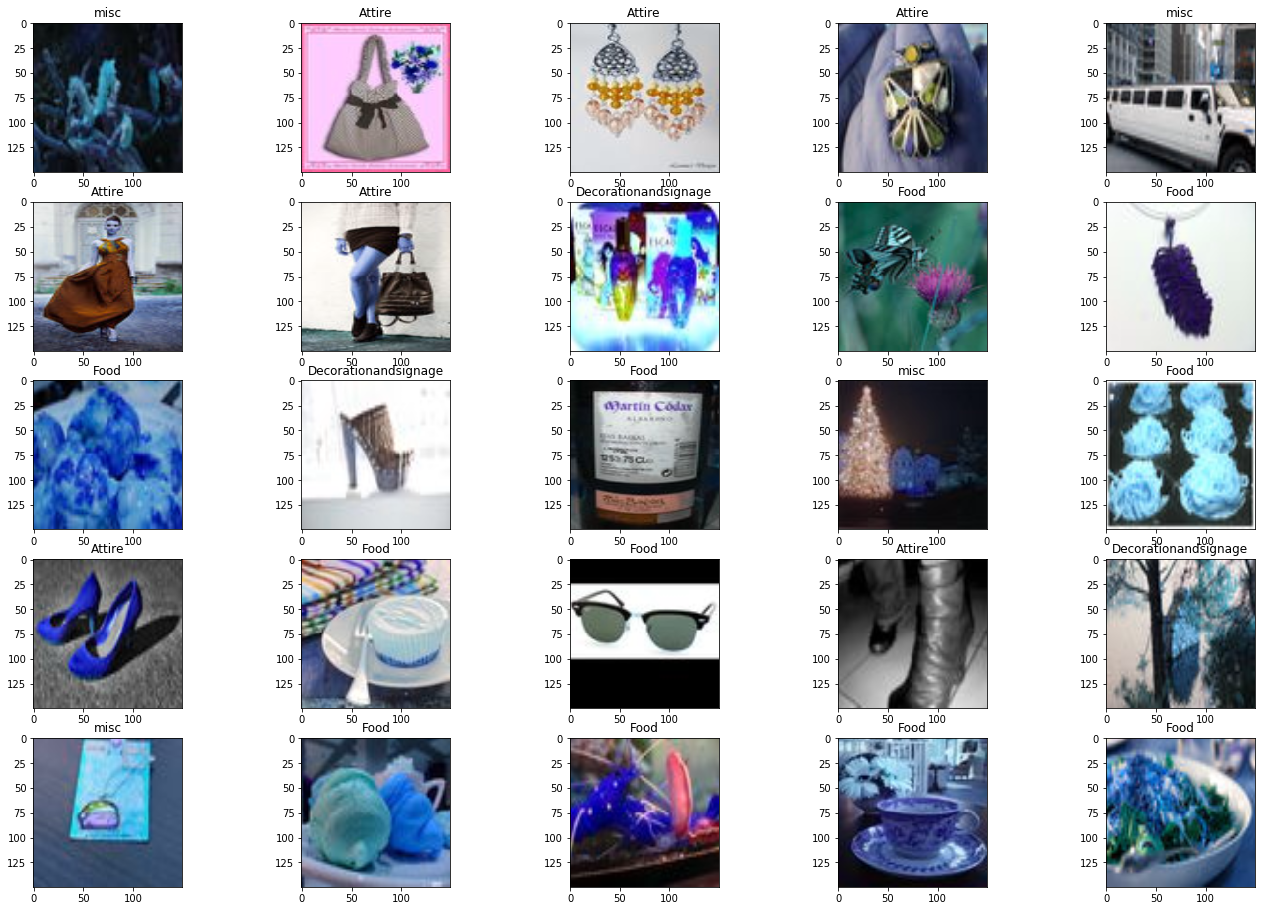

In [78]:
#predictions using 'model_vgg' model
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(pred_images))
        pred_image = np.array([pred_images[rnd_number]])
        pred_class = get_classlabel(model_vgg.predict_classes(pred_image)[0])
        ax[i,j].imshow(pred_image[0].astype('uint8'))
        ax[i,j].set_title(pred_class)